In [3]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations
gr();

┌ Info: Recompiling stale cache file /Users/sheehanolver/.julia/compiled/v1.0/SingularIntegralEquations/OCv8s.ji for SingularIntegralEquations [e094c991-5a90-5477-8896-c1e4c9552a1a]
└ @ Base loading.jl:1190
┌ Warning: Package SingularIntegralEquations does not have Random in its dependencies:
│ - If you have SingularIntegralEquations checked out for development and have
│   added Random as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with SingularIntegralEquations
└ Loading Random into SingularIntegralEquations from project dependency, future warnings for SingularIntegralEquations are suppressed.


# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\dx{\D x}
\def\dt{\D t}
\def\C{{\mathbb C}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqfor{\qquad\hbox{for}\qquad}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

Office Hours: 3-4pm Mondays, Huxley 6M40
<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes

# Lecture 19: Logarithmic singular integrals

1. Evaluating logarithmic singular integrals
2. Logarithmic singular integrals and orthogonal polynomials
2. Solving a logarithmic singular integral equation
2. Application: electrostatic potentials in 2D
    - Potential arising from a point charge and a single plate
    
The motivation behind this lecture is to calculate electrostatic potentials. An example is the Faraday cage: imagine a series of metal plates connected together so that they have the same charge. If configured to surround a region, this configuration will shield the interior from an external charge:

![Faradaycage](Laplacetangentialplot.jpg)

Here, the coloured lines are equipotential lines, and there is a point source at $x = 2$, which corresponds to a forcing of 
$$\log\| (x,y)  - (2,0) \| = \log|z - 2|$$
where  $z = x + \I y$. 

## Logarithmic singular integrals

From the Green's function of the Laplacian, it is natural to consider logarithmic singular integrals, and we focus yet again on $[-1,1]$:

$$v(z) = {1 \over \pi }\int_{-1}^1 f(t) \log | z - t| \dt$$

Note that off $[-1,1]$, $v(z)$ solves Laplace's equation, and is continuous on $[-1,1]$:

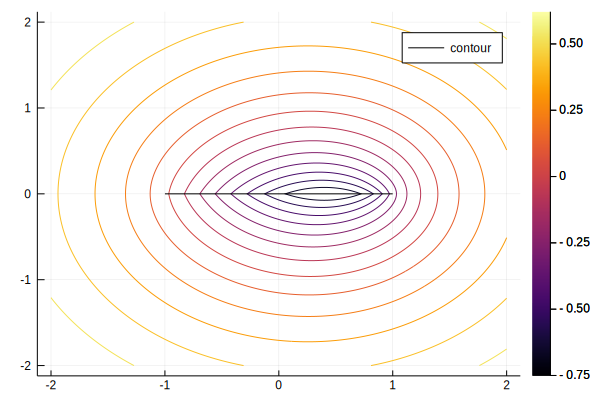

In [5]:
t = Fun()
f = sqrt(1-t^2)*exp(t)
v = z -> logkernel(f, z)  # logkernel(f,z) calculates 1/π * \int f(t)*log|t-z| dt

xx = yy = -2:0.01:2
V = v.(xx' .+ im*yy)

contour(xx, yy, V)
plot!(domain(t); color=:black, label="contour")

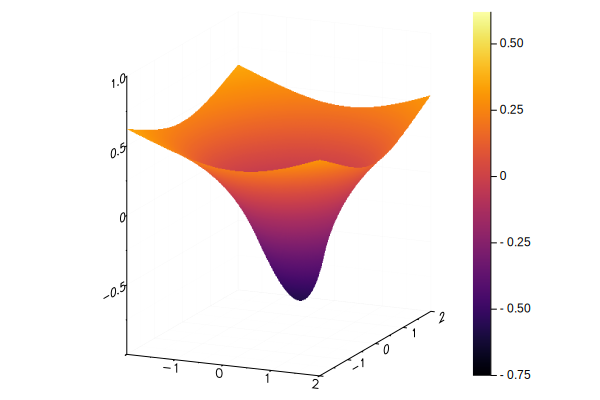

In [6]:
surface(xx, yy, V)

Continuity follows since $\log|x-t|$ is integrable for $-1 \leq x \leq 1$ provided $f(t)$ has weaker than pole singularities. 

For $z \notin (-\infty,1]$ this can also be seen since $v$ is the real part of an analytic function:
$$
    v(z) = \Re {1 \over \pi} \int_{-1}^1 f(t) \log ( z - t) \dt
$$
Note that the integrand avoids the branch cut of $\log z$. To extend this to $z\in (-\infty,-1]$ (or more generally, $z \notin [-1,\infty)$), we can use the alternative expression
$$
    v(z) = \Re {1 \over \pi} \int_{-1}^1 f(t) \log (t-z) \dt
$$
which follows from $\log|z-t| = \log|t-z|$.

In [7]:
z = 2.0 +3.0im
@show v(z)
@show sum(f*log(abs(z-t)))/π
@show sum(f*log(z-t))/π
@show sum(f*log(t-z))/π;

v(z) = 0.7068168642791222
sum(f * log(abs(z - t))) / π = 0.7068168642791223
sum(f * log(z - t)) / π = 0.7068168642791222 + 0.5923597267719309im
sum(f * log(t - z)) / π = 0.7068168642791222 - 1.1831399624402499im


### Evaluating logarithmic singular integrals

How can we actually evaluate 
$$
Lu(z) = {1 \over \pi} \int_{-1}^1 u(t) \log (z-t) \dt
$$
for $z$ in the complex plane?  We relate this to the indefinite integral of the Cauchy transform, and then use that to reduce it to a Cauchy transform itself.

#### Integrated Cauchy transform

For $z$ away from the branch cut our integrand is "nice" (assuming $u$ itself is "nice") and we can exchange integration and differentiation to determine
$$
{\D \over \D z} Lu(z) = {1 \over \pi} \int_{-1}^1 u(t) {1\over z -t}  \dt = -2 \I \CC u(z)
$$
thus if we can calculate $\int^z Cu(\zeta) \D \zeta$, we are in good shape. 


_Example_ If $u(x) = {1 \over \sqrt{1-x^2}}$, then recall
$$
Cu(z) = {-1 \over 2 \I \sqrt{z-1} \sqrt{z+1}}
$$
We therefore have
$$
{\D \over \D z} Lu(z) = {1 \over \sqrt{z-1} \sqrt{z+1}} 
$$
and therefore for some constant of integration $D$ we have
$$
Lu(z) + D = \pi \int^z {\D z \over \sqrt{z-1} \sqrt{z+1}} = 2 \pi \log\left(\sqrt{z-1} + \sqrt{z+1}\right)
$$
We need the right constant of integration. we can find that via the behaviour as $x \rightarrow \infty$:
$$
Lu(x) ={1 \over \pi}  \int_{-1}^1 u(t) \log(x-t) \dt = {\log x \over \pi}  \int_{-1}^1 u(t) \dt +  {1 \over \pi} \int_{-1}^1 u(t) \log(1-t/x) \dt = {\log x  \over \pi}\int_{-1}^1 u(t) \dt +  O(x^{-1})
$$
Since we have
$$
\int_{-1}^1 {1 \over \sqrt{1-x^2}} \dx = \pi
$$
and
$$
2 \log(\sqrt{x-1} + \sqrt{x+1}) = 2 \log \sqrt x + 2 \log(\sqrt{1-1/x} + \sqrt{1 + 1/x}) = 
\pi \log x + 2\pi \log(2) + O(1/x)
$$
therefore, 
$$
Lu(z) = 2  \log\left(\sqrt{z-1} + \sqrt{z+1}\right) - 2  \log 2
$$

_Demonstration_ We want to calculate the log kernel of $1/\sqrt{1-x^2}$:

In [10]:
x = Fun()
u = 1/sqrt(1-t^2)
z = 1+im
sum(u*log(z-x))/π

0.3681278813450904 + 0.9045568943023814im

We saw that its derivative is given in terms of the Cauchy transform, here we test it using finite difference approximation:

In [17]:
h = 0.0001;
(sum(u*log(z+h-x))/π - sum(u*log(z-x))/π)/h , sum(u/(z-x))/π, -2im*cauchy(u,z)

(0.3515911336637867 - 0.5688482444998755im, 0.35157758425414287 - 0.5688644810057831im, 0.3515775842541429 - 0.568864481005783im)

But we already know the Cauchy transform in closed form:

In [22]:
Cu = z -> -1/(2im*sqrt(z-1)sqrt(z+1))

-2im*Cu(z)

0.3515775842541429 - 0.568864481005783im

This we can integrate in closed form to determine:

In [24]:
Lu = z -> 2*log(sqrt(z-1) + sqrt(z+1)) - 2*log(2)
Lu(z)

0.36812788134509056 + 0.9045568943023812im

#### Reduction to a Cauchy transform

The representation is not ideal as it involves indefinite integration in the complex plane. However, we will see that we can actually express $L u (z)$ as a Cauchy transform of $\int_x^1 u(t) \dt$. 

**Lemma (Log kernel as Cauchy transform)** Suppose $u$ is "nice" (as in Plemelj). Then 
$$
Lu(z) = {\log(z-a) \over \pi} \int_a^b u(x) \dx +2 \I C U(z)
$$
where 
$$
U(x) = \int_x^b u(t) \dt
$$

**Proof**

We use Plemelj to prove this result (of course!) and assume $[a,b] = [-1,1]$. Note that $Lu$ satisfies the following Riemann–Hilbert problem:

1. $Lu(z) \sim {1 \over \pi} \int_{-1}^1 u(t) \dt \log z + o(1)$
2. $L^+ u(x) - L^- u(x) = 2 \I \int_x^1 u(t) \dt $ for $-1 < x < 1$
3. $L^+ u(x) - L^- u(x) = 2\I \int_{-1}^1 u(t) \dt $ for $x < -1$


The first part follows immediately by noting for $z \rightarrow + \infty$ we have 
$$\log(z - x) = \log(z (1 - x/z)) = \log z + \log(1-x/z) = \log z + o(1)$$

We now see where the jumps come from. Since
 $Lu'(z) = -2 \I Cu(z)$ and
 This let's us think of $Lu (z)$ as (2 is arbitrary here)
$$
L u(z) = Lu(2) + \int_2^z C u (\zeta) \D\zeta
$$
where the contour is a straight line (just like in the problem sheet for $\log z$ that I'm sure everyone has done by now), but we can think of it also as an arc that avoids $[-1,1]$.

Consider $x < -1$. Given an ellipse $\gamma$ surrounding $[-1,1]$ we can write the integral representations and exchange orders to get: 
$$
L u^+(x) - L u^-(x) = -2 \I \oint_\gamma C u(\zeta) \D\zeta =  -2 \I \int_{-1}^1 u(t) {1\over 2 \pi \I} \oint_\gamma {1 \over t-z} \dt \D \zeta =  2 \I \int_{-1}^1 u(t) \dt 
$$

For $-1 < x < 1$, note that
$
L u(1) 
$
is well-defined as there is only a logarithmic singularity times an algebraic one.  Thus deforming the contour onto the interval we have 
$$
L^\pm u(x) = -2 \I \int_1^x C^\pm u(t) \dt + L u(1),
$$
hence
$$
L^+ u(x) -L^- u(x) = 2 \I \int_x^1 (C^+ u(t) - C^- u(t)) \dt =2 \I \int_x^1 u(t) \dt
$$
⬛️



_Example_
For the problem above, we have that $\int_x^1 {1 \over \sqrt{1-t^2}}\dt = {\rm arccos}\, x$, which gives us:

In [37]:
x = Fun()

u = 1/sqrt(1-x^2)
U = acos(x)


Lu = z -> 2*log(sqrt(z-1) + sqrt(z+1)) - 2*log(2)

sum(u) * log(z+1)/π + sum(U/(x-z))/(π), Lu(z)

(0.36812788134509017 + 0.9045568943023812im, 0.36812788134509056 + 0.9045568943023812im)

# Log transforms of weighted orthogonal polynomials


Now consider ${1 \over \pi} \int_a^b p_k(x) w(x) \log |z-x| \dx$, which we write in terms of the real part of
$$
L_k(z) = L[p_k w](z) = {1 \over \pi } \int_a^b p_k(x) w(x) \log (z-x) \dx
$$

For $k > 0$ we have $\int_a^b p_k(x) w(x) dx = 0$ due to orthogonality, and hence we actually have no branch cut:

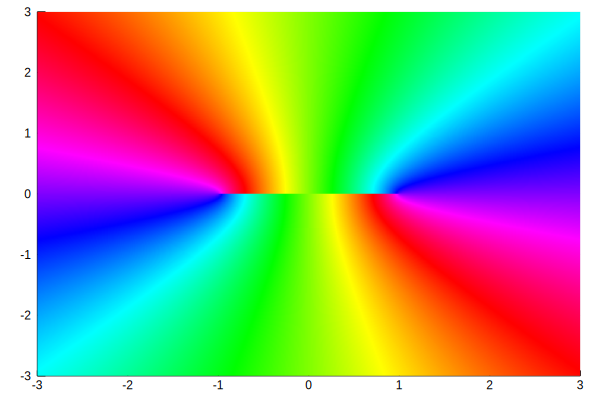

In [40]:
T₅ = Fun(Chebyshev(), [zeros(2);1])
w = 1/sqrt(1-x^2)
L₅ = z->cauchyintegral(w*T₅, z)

phaseplot(-3..3, -3..3, L₅)



#### Example: Weighted Chebyshev log transform

For classical orthogonal polynomials we can go a step further and relate the indefinite integrals to other orthogonal polynomials.

 For example, recall that
$$
{\D\over \dx}[\sqrt{1-x^2} U_n(x)] = -{n+1 \over \sqrt{1-x^2}} T_{n+1}(x)
$$
in other words, 
$$
\int_x^1 {T_k(t) \over \sqrt{1-t^2}} \dt = -{\sqrt{1-x^2} U_{k-1}(x) \over k}
$$
Thus for $k=1,2,\ldots$,
$$
L_k(z) = -{1 \over n+1} \CC[\sqrt{1-\diamond^2} U_{k-1}](z)
$$
and
$$
{1 \over \pi} \int_{-1}^1 {T_k(x) \over \sqrt{1-x^2}}\log(z-x) \dx = {2 \I \over k}   \CC[\sqrt{1-\diamond^2} U_{k-1}](z)
$$


In [42]:
T₅ = Fun(Chebyshev(), [zeros(5);1])
U₄ = Fun(Ultraspherical(1), [zeros(4);1])
x = Fun()
L₅ = z->sum(T₅/sqrt(1-x^2) * log(z-x))/π

L₅(z), 2im*cauchy(sqrt(1-x^2)*U₄,z)/5

(0.00018695792399762436 - 0.0009741971129007227im, 0.0001869579239976236 - 0.000974197112900722im)

As we saw last lecture, Cauchy transforms of OPs satisfy simple recurrences, and this relationship renders log transforms equally calculable. 



### Solving logarithmic singular integral equations

Oddly enough, it is easier to solve a singular integral equation involving the logarithmic kernel than to actually calculate the logarithmic singular integral, so we begin here. Consider the problem of calculating $u(x)$ such that
$$
{1 \over \pi} \int_{-1}^1 u(t) \log | x-t| \dt = f(x) \qqfor -1 < x < 1
$$


To tackle this problem we first need to understand the additive jump $Re L^\pm(x) = {L^+(x) + L^-(x) \over 2}$. Thinking in terms of integrals of Cauchy transforms we see that
$$
L^+u(x) + L^-u(x) = -2\I (2\int_2^1 \CC u(x) \dx + \int_1^x [C^+ u(t) + C^-u(t)] \dt)  =
  D   -2 \I \int_1^x (-\I H u(t)) \dt = D + 2\int_x^1 H u(t) dt
$$
That is, it is expressed as an indefinite integral of the Hilbert transform.  We therefore have:
$$
{\D \over \dx} {1 \over \pi} \int_{-1}^1 u(t) \log | x-t| \dt = {\D \over \dx} \int_x^1 H u(t) dt = - Hu(x)
$$
where the minus sign comes from the fact that $x$ is the lower limit. In other words, our original SIE becomes equivalent to inverting the Hilbert transform:
$$
\HH u(x) = -f'(x)
$$
recall, we can express the solution as
$$
    u = {1 \over \sqrt{1-x^2}} \HH[\sqrt{1-\diamond^2} f] + {C\over \sqrt{1-x^2}}
$$

Let's do a numerical example:

In [43]:
x = Fun()
f = exp(x)

C = randn()

u₁ = hilbert(sqrt(1-x^2)*f')/sqrt(1-x^2) 

u = u₁ + C/sqrt(1-x^2)

@show hilbert(u, 0.1) + f(0.1)
@show logkernel(u,0.1) - f(0.1)  # didn't work 😩
@show logkernel(u,0.2) - f(0.2);  # but we are only off by a constant

hilbert(u, 0.1) + f(0.1) = -4.440892098500626e-16
logkernel(u, 0.1) - f(0.1) = -0.18115023187927326
logkernel(u, 0.2) - f(0.2) = -0.18115023187927304


Remember: for inverting the Hilbert transform we had a degree of freedom: every solution plus $C/\sqrt{1-x^2}$ was also a solution. But here, since we differentiated, we use that degree of freedom to ensure that we have arrived at the right solution. 

To choose $C$,  we use the fact that
$$
f(0) = {1 \over \pi} \int_{-1}^1 u(t) \log |t| \dt
$$
If we can calculate the right integral, we can use this to choose $C$:

In [44]:
# choose C so that
# logkernel(u₁, 0) + C*logkernel(1/sqrt(1-x^2), 0) == f(0)
C = (f(0) - logkernel(u₁, 0))/logkernel(1/sqrt(1-x^2), 0)
u = u₁ + C/sqrt(1-x^2)

@show hilbert(u, 0.1) + f(0.1)
@show logkernel(u,0.1) - f(0.1)  # Works!
@show logkernel(u,0.2) - f(0.2);  # And at all x!

hilbert(u, 0.1) + f(0.1) = -4.440892098500626e-16
logkernel(u, 0.1) - f(0.1) = 0.0
logkernel(u, 0.2) - f(0.2) = 2.220446049250313e-16


*Example* We now do an example which can be solved by hand. Find $u(x)$ so that: 
$$
\int_{-1}^1 u(t) \log | x-t| \dt = 1.
$$
Differentiating, we know that 
$$
\int_{-1}^1 {u(t) \over x-t} \dt = 0
$$
hence $u(x)$ must be of the form ${C \over \sqrt{1-x^2}}$.  Which $C$? Make it work for $x = 0$:
$$
1 = \int_{-1}^1 u(t) \log | 0 - t| \dt = C \int_{-1}^1 {\log | t| \over \sqrt{1-t^2}}  \dt
$$
To evaluate the integral, we can use trigonmetric variables:
$$
\int_0^1 {\log t \over \sqrt{1-t^2}}  \dt = \int_0^{\pi \over 2} {\cos \theta \log \sin \theta \over \sqrt{1-\sin^2 \theta}}   \D\theta = \int_0^{\pi \over 2} \log \sin \theta  \D\theta = - {\pi \log 2\over 2}
$$
(The last identity takes some work: I'll leave it as an excercise.)

Thus we have $ C = -{1 \over \pi \log 2}$

In [49]:
x = Fun()
C = -1/(log(2))
u = C/sqrt(1-x^2)

logkernel(u, 0.2) 

1.0

Physically, this solution gives us the potential field 
$$
\int_{-1}^1 u(t) \log|z-t| \dt
$$
corresponding to holding a metal plate at constant potential:

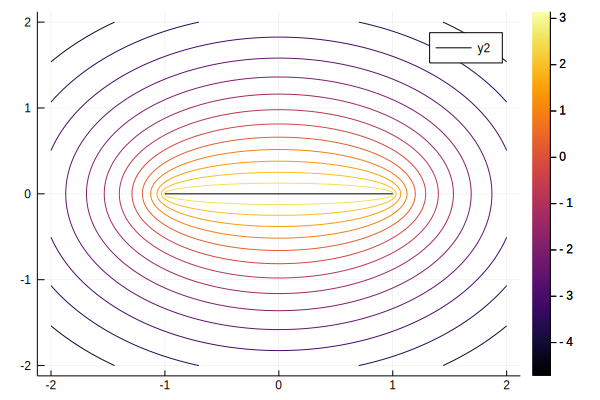

In [52]:
v = z -> π*logkernel(u, z)

xx = yy = -2:0.01:2
V = v.(xx' .+ im*yy)

contour(xx, yy, V)
plot!(domain(x); color=:black)

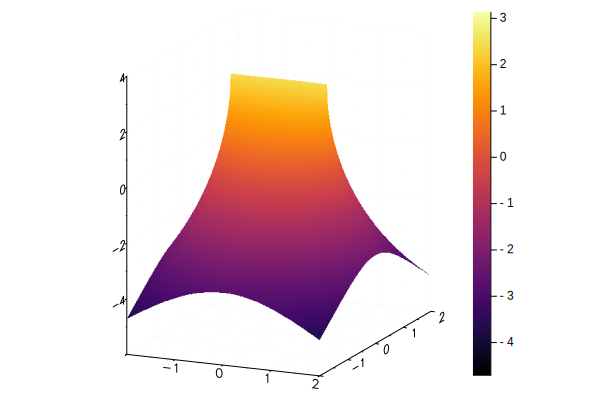

In [53]:
surface(xx, yy, V)

## Application: Potential arising from a point charge and a single plate

Now imagine we put a point source at $x = 2$, and a metal plate on $[-1,1]$. We know the potential on the plate must be constant, but we don't know what constant. This is equivalent to the following problem:
\begin{align*}
v_{xx} + v_{yy} = 0 &\qqfor \hbox{off $[-1,1]$ and $2$}  \\
v(z) \sim \log |z - 2|  &\qqfor z \rightarrow 2 \\
v(z) \sim \log|z| &\qqfor z \rightarrow \infty \\
v(x) = \kappa &\qqfor -1 < x < 1
\end{align*}
where $\kappa$ is an unknown constant.  We write the solution as
$$
v(z) = {1 \over \pi} \int_{-1}^1 u(t) \log|t-z| \dt + \log|z-2|
$$
for a to-be-determined $u$. On $-1 < x < 1$ this satisfies
$$
 {1 \over \pi} \int_{-1}^1 u(t) \log|t-x| \dt  = \kappa - \log(2-x)
$$

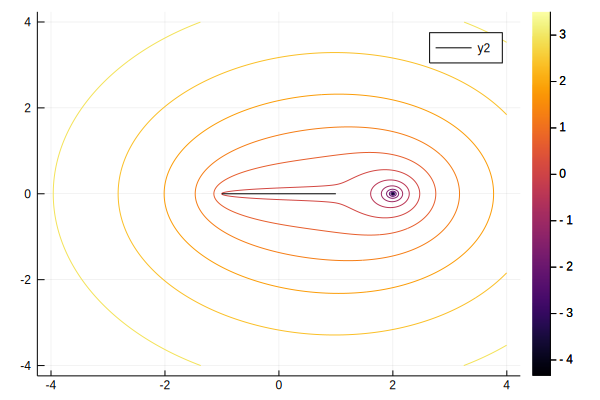

In [59]:
x = Fun()
u = SingularIntegral(0)  \ log(2-x)
v = z -> log(abs(2-z)) - real(logkernel(u, z))
xx = yy = -4:0.011:4
V = v.(xx' .+ im*yy)

contour(xx, yy, V)
plot!(domain(x); color=:black)

We will see how this can be solved explicitely in the next problem sheet.